In [1]:
# Use the octogonal 3-5-5-5-3 kernel.

# Use use the "L" shaped kernel (same as the text book) to detect the upper-right corner for hit-and-miss transform.

# Write programs which do gray scale morphological dilation, erosion, opening, and closing on a gray scale image.
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('lena.bmp')
#用 pyplot 使 Img 顯示在 jupyter notebook 中
def imshow(img):
    plt.imshow(img[:,:,::-1])#因為 plt 與 cv 一個是 RGB 另一個是 BGR

#Binarize Lena with the threshold 128
img2 = img.copy()
for i in img2:
    for j in i:
        if j[0] >= 128:
            j[0] = j[1] = j[2] = 255
        else:
            j *= 0
imshow(img2)

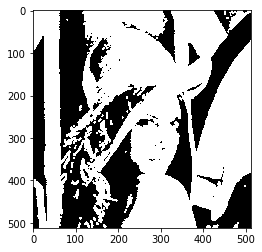

In [2]:
kernel = np.ones((5,5), np.uint8) 
kernel[0][0] = kernel[0][4] = kernel[4][0] = kernel[4][4] = 0

def dilate(img, kernel):
    img_dilation = img.copy()
    for i in range(len(img)):
        for j in range(len(img[0])):
            if img[i][j][0] == 255:
                for k in range(i-len(kernel)//2, i+len(kernel)//2+1):
                    for l in range(j-len(kernel)//2, j+len(kernel)//2+1):
                        if 0 <= k <= len(img)-1 and 0 <= l <= len(img[0])-1:
                            if kernel[k - i + len(kernel)//2][l - j + len(kernel)//2] == 1:
                                img_dilation[k][l] = [255, 255, 255]    
    return img_dilation
img_dilation = dilate(img2, kernel)
imshow(img_dilation)

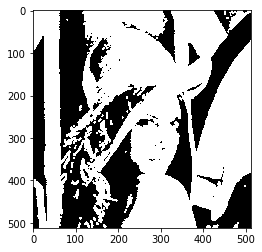

In [3]:
kernel = np.ones((5,5), np.uint8) 
kernel[0][0] = kernel[0][4] = kernel[4][0] = kernel[4][4] = 0
img_dilation2 = cv2.dilate(img2, kernel, iterations=1) 
  
imshow( img_dilation2) 

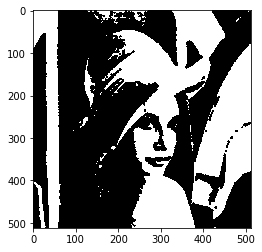

In [80]:
def erosion(img, kernel):
    img_erosion = img.copy()
    for i in range(len(img)):
        for j in range(len(img[0])):
            if img[i][j][0] == 0:
                for k in range(i-len(kernel)//2, i+len(kernel)//2+1):
                    for l in range(j-len(kernel)//2, j+len(kernel)//2+1):
                        if 0 <= k <= len(img)-1 and 0 <= l <= len(img[0])-1:
                            if kernel[k - i + len(kernel)//2][l - j + len(kernel)//2] == 1:
                                img_erosion[k][l] = [0, 0, 0]   
    return img_erosion
def erode_(img, kernel):
    img_erosion = img.copy()
    for i in range(len(img)):
        for j in range(len(img[0])):
            if img[i][j][0] == 255:
                for k in range(i-len(kernel)//2, i+len(kernel)//2+1):
                    for l in range(j-len(kernel)//2, j+len(kernel)//2+1):
                        if 0 <= k <= len(img)-1 and 0 <= l <= len(img[0])-1  :
                            if kernel[k - i + len(kernel)//2][l - j + len(kernel)//2] == 1 and img[k][l][0] != 255:
                                img_erosion[i][j] = [0, 0, 0]
                        elif kernel[k - i + len(kernel)//2][l - j + len(kernel)//2] == 1:
                            img_erosion[i][j] = [0, 0, 0] 
                    
    return img_erosion

img_erosion = erosion(img2, kernel)
imshow(img_erosion)

True


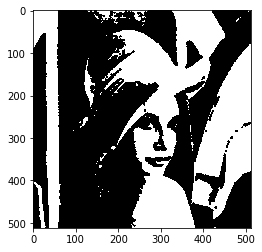

In [5]:
img_erosion2 = cv2.erode(img2, kernel)
if (img_erosion2 == img_erosion).all():
    print(True)
else:
    print(False)
imshow(img_erosion2)

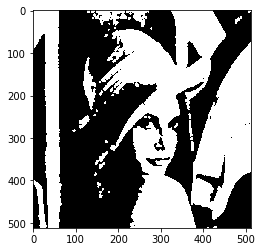

In [6]:
def opening(img, kernel):
    img_opening = erosion(img, kernel)
    img_opening = dilate(img_opening, kernel)
    return img_opening
img_opening = opening(img2, kernel)
imshow(img_opening)

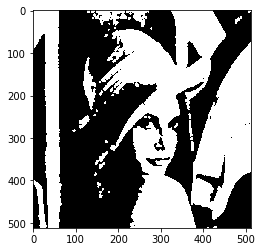

In [7]:
img_opening2 = cv2.dilate(img_erosion, kernel, iterations=1) 
imshow(img_opening2)

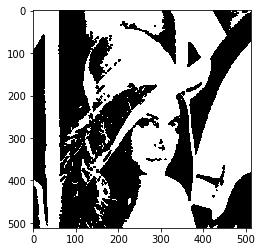

In [9]:
def closing(img, kernel):
    img_closing = dilate(img, kernel)
    img_closing = erosion(img_closing, kernel)
    return img_closing
img_closing = closing(img2, kernel)
imshow(img_closing)

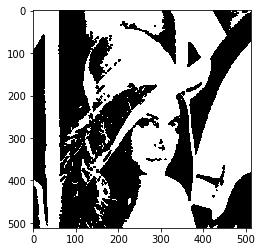

In [10]:
img_closing2 = cv2.erode(cv2.dilate(img2, kernel), kernel, iterations=1) 
imshow(img_closing2)


[[0 1 1]
 [0 0 1]
 [0 0 0]]
[[0 0 0]
 [1 1 0]
 [0 1 0]]


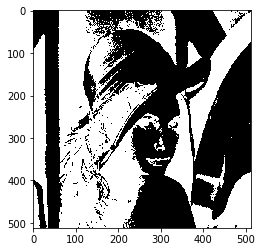

In [41]:
kernel_k = np.zeros((3,3), np.uint8)
kernel_k[0][1] = kernel_k[0][2] = kernel_k[1][2] = 1
print(kernel_k)
kernel_j = np.zeros((3,3), np.uint8)
kernel_j[1][0] = kernel_j[1][1] = kernel_j[2][1] = 1
print(kernel_j)
h_img = img2.copy()
img2_c = img2.copy()
for i in range(len(h_img_c)):
    for j in range(len(h_img_c[0])):
        if img2_c[i][j][0] == 255:
            img2_c[i][j] = [0, 0 ,0]
        else:
            img2_c[i][j] = [255, 255, 255]
imshow(img2_c)

In [70]:
h_img = img2.copy()
h_img_c = img2_c.copy()

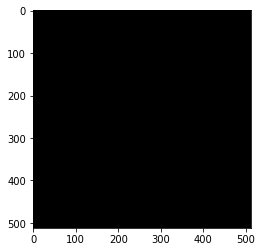

In [79]:
h_img = img2.copy()
h_img_c = img2_c.copy()
h_img = erosion(h_img, kernel_j)
h_img_c = erosion(h_img_c, kernel_k)
h_and_m = img2.copy()
for i in range(len(h_img_c)):
    for j in range(len(h_img_c[0])):
        if h_img_c[i][j][0] == h_img[i][j][0]:
            h_and_m[i][j] = h_img[i][j][0]
        else:
            h_and_m[i][j] = [0, 0, 0]
imshow(h_and_m)

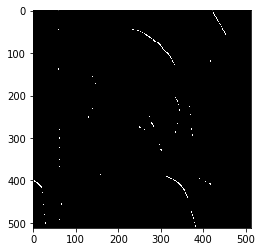

In [78]:

h_img = cv2.erode(h_img, kernel_j)
h_img_c = cv2.erode(h_img_c, kernel_k)
h_and_m = img2.copy()
for i in range(len(h_img_c)):
    for j in range(len(h_img_c[0])):
        if h_img_c[i][j][0] == h_img[i][j][0]:
            h_and_m[i][j] =  h_img[i][j]
        else:
            h_and_m[i][j] = [0, 0, 0]
imshow(h_and_m)